<a href="https://colab.research.google.com/github/Rohan1-tech/AutoPrice-ML-Predicting-Car-Values-Using-Machine-Learning/blob/main/AutoPrice_ML_Predicting_Car_Values_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  - **AutoPrice ML: Predicting Car Values Using Machine Learning**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.


The used car market has grown rapidly in recent years, with millions of customers preferring pre-owned vehicles due to affordability, value retention, and wide availability. As a result, accurately estimating a car’s fair market price has become a significant challenge for both buyers and sellers. Incorrect pricing can lead to financial losses, poor negotiation outcomes, or extended listing periods. This project, **AutoPrice ML**, aims to build a reliable and intelligent machine learning system that predicts the price of used cars based on their key attributes. The solution is developed using real-world data obtained from Quikr, a popular online marketplace for used vehicles.

The project involves cleaning and preparing the dataset, which contains details such as car name, year, kilometers driven, fuel type, and selling price. We explore the data to understand trends, identify important features, and check how factors like age and mileage affect car value. Feature engineering is performed to extract meaningful information, such as car age and brand.

Machine learning models like Linear Regression and Random Forest are then trained and evaluated to find the best-performing model for price prediction. Overall, **AutoPrice ML** provides a simple, practical, and data-driven approach to estimating used car prices with better accuracy.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**



The price of a used car depends on multiple factors such as its brand, manufacturing year, mileage, fuel type, and overall condition. Buyers often struggle to estimate the fair value of a vehicle, while sellers risk underpricing or overpricing their listings. This leads to confusion, financial loss, and inefficient negotiations.
The goal of this project, **AutoPrice ML**, is to build a machine learning model that can accurately predict the selling price of a used car based on its key features. Using real-world data collected from Quikr, the model will analyze important attributes and generate a reliable price estimate.
This system will help buyers make informed purchasing decisions and assist sellers in setting competitive and justified prices.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset

from google.colab import files
uploaded = files.upload()

Saving quikr_car.csv to quikr_car.csv


### Dataset First View

In [5]:
# Dataset First Look


df = pd.read_csv("quikr_car.csv")

df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

rows, cols = df.shape
print("Total Rows:", rows)
print("Total Columns:", cols)



Total Rows: 892
Total Columns: 6


### Dataset Information

In [7]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

print(df.duplicated().sum())


94


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


<Axes: >

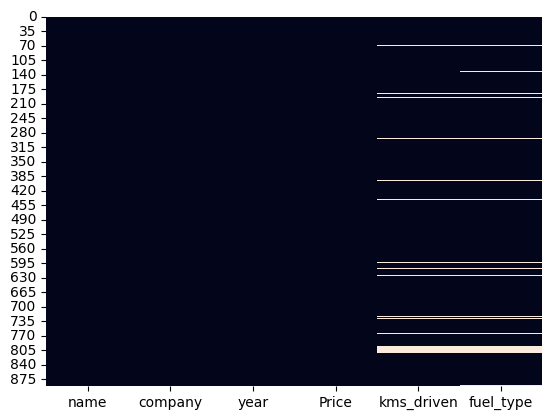

In [10]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)



# **Data Issues Identified**

During the initial exploration of the dataset, several inconsistencies and formatting issues were identified:



 **1. Year Column Issues**

* Contains non-year values and random text.
* Mixed formats and inconsistent data types.
* Includes garbage text instead of proper manufacturing years.
* Requires extraction of only valid 4-digit years.



**2. Company Column Issues**

* Inconsistent capitalization (e.g., Tata, tata, TATA).
* Contains unrelated words not associated with car brands.
* Includes incomplete or incorrect brand names.
* Needs normalization and filtering of valid car manufacturers.


 **3. Name Column Issues**

* Contains full sentences or marketing text instead of model names.
* Includes truncated, incomplete, or messy names.
* Contains unnecessary keywords like “used”, “sale”, etc.
* Requires extraction of proper **brand + model** information.


**4. Kms_Driven Column Issues**

* Contains commas in numeric values.
* Includes text like “kms” or “Km” inside the values.
* Contains completely incorrect entries such as “Petrol”.
* Has unrealistic or invalid values like “0 kms” or “00 kms”.
* Requires extraction of digits and conversion to integer.


 **5. General Dataset Issues**

* Unstructured scraped data with significant noise.
* Inconsistent formatting across multiple columns.
* Numeric and text values mixed together.
* Requires extensive text cleaning, regex extraction, normalization, and type conversions.




### What did you know about your dataset?

Answer Here

The dataset contains used car listings collected from Quikr, an online marketplace. It includes important information about each vehicle such as its name, company (brand), manufacturing year, kilometers driven, fuel type, and selling price. The dataset is relatively small but represents real-world, unstructured marketplace data, which means several columns contain messy text, inconsistent formatting, and mixed data types.
Overall, the dataset provides enough features to build a machine learning model for predicting used car prices, but it requires significant cleaning and preprocessing before modeling.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns

df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [12]:
# Dataset Describe

df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


### Variables Description

Answer Here  


**Variables Description**

| Variable Name  | Description                                                                                   |
| -------------- | --------------------------------------------------------------------------------------------- |
| **name**       | The full name of the car, usually including the brand and model (e.g., “Hyundai i20 Sportz”). |
| **company**    | The manufacturer or brand of the car (e.g., Maruti, Hyundai, Honda, Toyota).                  |
| **year**       | Manufacturing year of the car. Used to calculate the car’s age.                               |
| **Price**      | The selling price of the used car (this is the **target variable** we want to predict).       |
| **kms_driven** | The total distance the car has been driven in kilometers. Indicates usage and wear.           |
| **fuel_type**  | The type of fuel used by the car (e.g., Petrol, Diesel, CNG).                                 |




### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())




Unique values in 'name':
['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Step 1: Remove Duplicates

df = df.drop_duplicates()
df = df.reset_index(drop=True)



# Step 2: Clean 'year'
# Convert to string
df['year'] = df['year'].astype(str)

# Extract 4-digit year
df['year'] = df['year'].str.extract(r'(\d{4})')

# Convert to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop invalid years
df = df.dropna(subset=['year'])

# Convert to integer
df['year'] = df['year'].astype(int)


# Step 3: Clean the 'company' Column

# Convert to string
df['company'] = df['company'].astype(str)

# Normalize case
df['company'] = df['company'].str.title()

# Remove invalid names
df = df[df['company'].str.len() > 2]



# Step 4: Clean the 'name' Column

# Convert to string
df['name'] = df['name'].astype(str)

# Convert to Title Case
df['name'] = df['name'].str.title()

# Keep first two words (Brand + Model)
df['name'] = df['name'].str.split().str[:2].str.join(' ')




# Step 5: Clean the 'kms_driven' Column

# Convert to string
df['kms_driven'] = df['kms_driven'].astype(str)

# Remove commas
df['kms_driven'] = df['kms_driven'].str.replace(',', '', regex=False)

# Remove 'kms'
df['kms_driven'] = df['kms_driven'].str.replace('kms', '', case=False, regex=False)

# Remove 'km'
df['kms_driven'] = df['kms_driven'].str.replace('km', '', case=False, regex=False)

# Extract digits
df['kms_driven'] = df['kms_driven'].str.extract(r'(\d+)')

# Convert to numeric
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['kms_driven'])

# Convert to integer
df['kms_driven'] = df['kms_driven'].astype(int)




# Step 6: Clean the 'Price' Column
# Convert to string
df['Price'] = df['Price'].astype(str)

# Remove commas
df['Price'] = df['Price'].str.replace(',', '', regex=False)

# Extract digits
df['Price'] = df['Price'].str.extract(r'(\d+)')

# Convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop invalid rows
df = df.dropna(subset=['Price'])

# Convert to integer
df['Price'] = df['Price'].astype(int)

### What all manipulations have you done and insights you found?

Answer Here.


In the Data Wrangling stage, several cleaning and transformation steps were performed to make the dataset ready for analysis and modeling. First, duplicate rows were removed to avoid repetition and bias in the model. The **year** column was cleaned by extracting only valid 4-digit years and converting them into integers, which helped remove incorrect text-based entries. The **company** column was normalized by converting all values to proper title-case formatting and removing invalid or very short company names.

Next, the **name** column was simplified by cleaning messy text and keeping only the first two meaningful words (Brand + Model), ensuring consistency in naming. The **kms_driven** column required multiple steps such as removing commas, removing “kms/km” text, extracting only numeric values, and converting them into integers. Similarly, the **Price** column was cleaned by removing commas, extracting digits, converting the values into numeric form, and dropping invalid entries.

 **Insights Found After Cleaning:**

* Many rows contained incorrect or messy text entries, especially in the *year*, *company*, and *name* columns.
* The dataset had many inconsistencies due to being scraped from an online marketplace, including mixed data types and non-numeric values in numeric columns.
* Several car listings had missing or unrealistic values, which required removal for better model accuracy.
* After cleaning, the dataset became structured, consistent, and suitable for EDA and machine learning.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

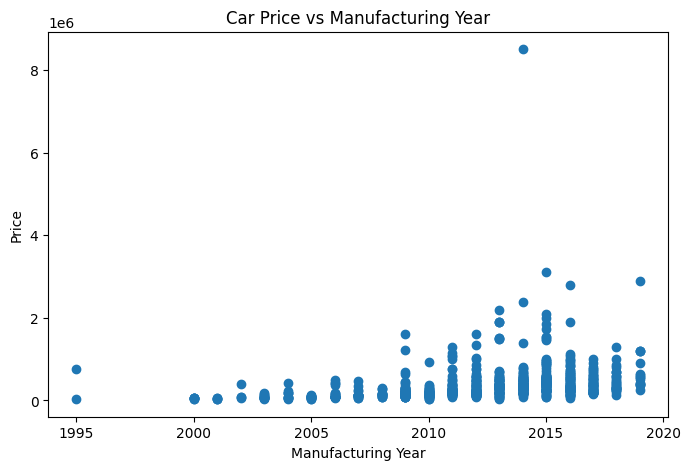

In [15]:
# Chart - 1 visualization code

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['Price'])
plt.xlabel("Manufacturing Year")
plt.ylabel("Price")
plt.title("Car Price vs Manufacturing Year")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A scatter plot is ideal for visualizing the relationship between two continuous variables—in this case, the car's manufacturing year and its price. It helps to quickly spot patterns, trends, and outliers, providing a straightforward way to see how much car age impacts selling price.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* Newer cars generally command higher prices, showing a clear negative correlation between car age and price.

* A few older cars show unexpectedly high prices, possibly due to luxury/classic status or data anomalies.

* Price drops sharply for very old cars, confirming that depreciation is a key factor in the used car market.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Positive Business Impact**:

* These insights guide pricing strategies for sellers and dealers by highlighting that recent manufacturing years yield premium values.

* Buyers can use this information to negotiate better deals for older vehicles, knowing that price typically drops as age increases.

* Businesses can optimize inventory by focusing on newer models, which have better demand and higher margins.

**Potential Negative Growth Insight**:

* If older cars are consistently overpriced, they may remain unsold, tying up inventory and reducing business efficiency.

* Identifying overpriced old cars allows businesses to adjust pricing to boost sales velocity and reduce stagnation.

#### Chart - 2

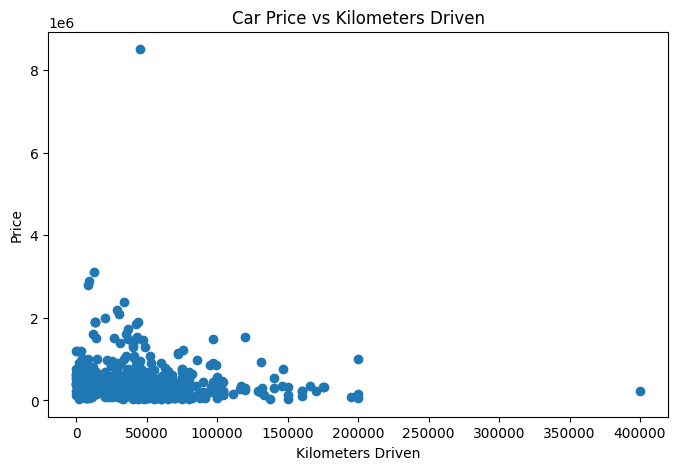

In [16]:
# Chart - 2 visualization code

# Price vs Kilometers Driven

plt.figure(figsize=(8,5))
plt.scatter(df['kms_driven'], df['Price'])
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.title("Car Price vs Kilometers Driven")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I selected this chart to analyze the relationship between how much a car has been driven (kms_driven) and its selling price. Kilometers driven is one of the most important factors affecting a car’s value, as higher usage typically leads to more wear and lower price. A scatter plot clearly shows how mileage impacts pricing, helps identify depreciation patterns, and highlights any unusual or inconsistent records in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we observe that cars with higher kilometers driven generally have lower prices, confirming the expected depreciation trend. Most high-priced cars fall in the lower mileage range, while cars with very high mileage tend to cluster in the lower price segment. We also notice a few outliers where some high-mileage cars still have high price, which may indicate premium brands or incorrect data entries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Yes, these insights can help create a positive business impact.**
By understanding that cars with higher kilometers driven usually have lower prices, sellers can set fair prices and buyers can make better decisions. This makes the buying–selling process smoother and reduces confusion or overpricing. Businesses like car dealers or resale platforms can also use this trend to improve their price estimation and build trust with customers.

**There are no major insights that cause negative growth.**
However, a few outliers (like high-mileage cars with high prices) may be misleading. These could be premium cars or wrongly entered data. If not handled properly, these outliers may create small mistakes in price prediction. But overall, the insight is helpful and supports better business decisions.



#### Chart - 3

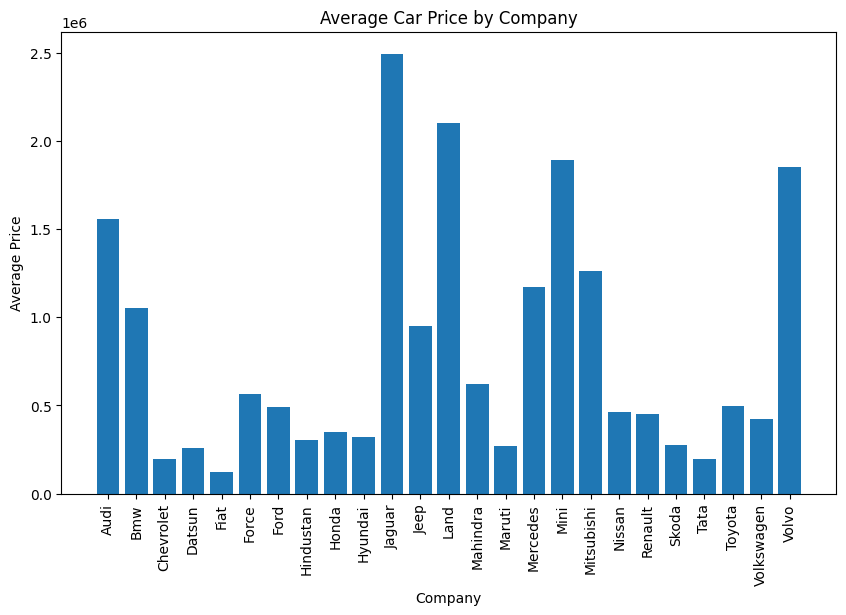

In [66]:
# Chart - 3 visualization code
# Average Car Price by Company

company_price = df.groupby('company')['Price'].mean()

plt.figure(figsize=(10,6))
plt.bar(company_price.index, company_price.values)
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.title("Average Car Price by Company")
plt.xticks(rotation=90)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.


I chose this chart to compare the average prices of cars from different companies. A bar chart is the best way to see which brands have higher prices and which brands usually sell for lower prices. It helps us understand how brand value affects the price of a used car.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see that some companies have a higher average selling price compared to others. Premium brands like Honda or Hyundai tend to have higher prices, while budget brands show lower average prices. This tells us that brand value has a direct impact on how much a used car can be sold for.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights help create a positive business impact. Knowing which brands hold higher value allows sellers to price their cars correctly and helps buyers understand which brands depreciate faster or slower. Businesses like car dealers can also use this information to choose which brands to focus on for better profits.

There are no major negative insights here, but if the pricing difference between brands is misunderstood, it may lead to overpricing or underpricing. As long as brands are compared correctly, this insight supports better pricing strategies.

#### Chart - 4

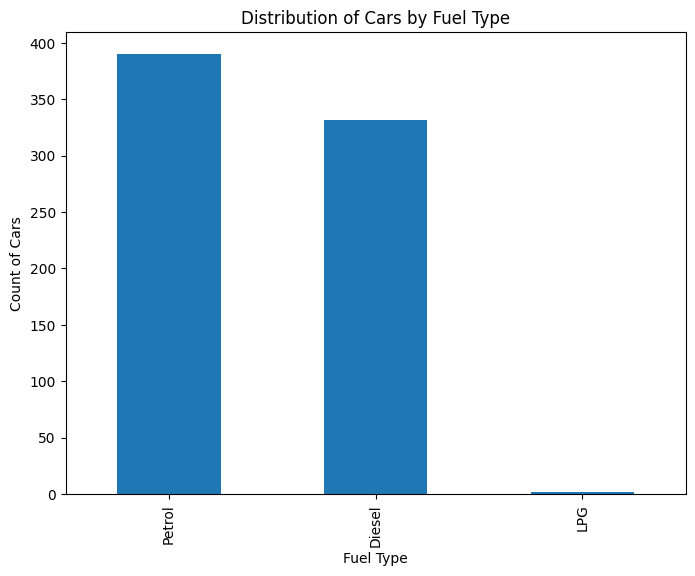

In [68]:
# Chart - 4 visualization code

plt.figure(figsize=(8,6))
df['fuel_type'].value_counts().plot(kind='bar')
plt.xlabel("Fuel Type")
plt.ylabel("Count of Cars")
plt.title("Distribution of Cars by Fuel Type")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose this chart to understand how many cars belong to each fuel type. Fuel type is an important factor for buyers and sellers, and a bar chart clearly shows which fuel types are more common in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see which fuel type has the highest number of cars. This tells us the popularity and availability of different fuel types. If one fuel type dominates the dataset, it means that type is more commonly listed or more preferred by users

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights can help in making positive business decisions. Knowing which fuel type is more commonly available helps sellers understand market demand and helps buyers compare options easily. Car dealers can focus on stocking fuel types that are more popular.

There are no major negative insights, but if one fuel type is very rare in the dataset, the model may not learn much about it. This can slightly affect prediction quality for that specific fuel type. Overall, the insights still support better decision-making.

#### Chart - 5

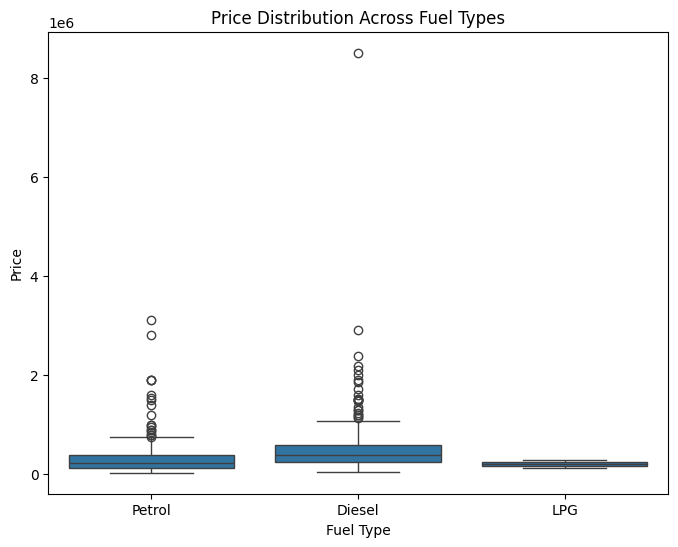

In [69]:
# Chart - 5 visualization code
# Price Distribution Across Fuel Types (Boxplot).


plt.figure(figsize=(8,6))
sns.boxplot(x='fuel_type', y='Price', data=df)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Price Distribution Across Fuel Types")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I selected this chart to compare how car prices vary across different fuel types. A boxplot is useful because it shows the price range, median price, and any outliers for each fuel type. This helps us understand which fuel type generally has higher or lower car prices.

##### 2. What is/are the insight(s) found from the chart?

Answer Here  

From the chart, we can see that different fuel types have different price ranges. Some fuel types have higher median prices, while others show lower overall prices. The chart also shows outliers, meaning some cars are priced much higher or lower than the normal range. This helps us understand pricing patterns for each fuel type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Answer Here

Yes, these insights can help create a positive business impact. By seeing how prices change for different fuel types, sellers can decide a fair price for their cars, and buyers can choose which fuel type fits their budget. This helps both sides make better decisions.

There are no big negative insights. The only small issue is that some fuel types may have very few cars, which can give a slightly confusing price range. Also, a few very high or very low prices (outliers) may affect the chart. But overall, the insight is helpful and useful for business.

#### Chart - 6

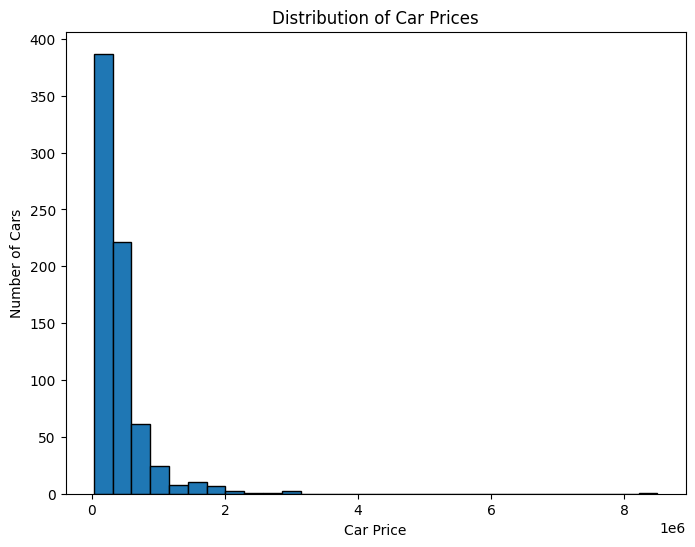

In [70]:
# Chart - 6 visualization code
# Distribution of Car Prices (Histogram)

plt.figure(figsize=(8,6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.xlabel("Car Price")
plt.ylabel("Number of Cars")
plt.title("Distribution of Car Prices")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose this chart to understand how car prices are spread across the dataset. A histogram is useful because it shows how many cars fall into different price ranges, helping us see whether most cars are cheap, mid-priced, or expensive.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see that most cars fall within a certain price range, while very high-priced cars are fewer in number. This tells us the common selling price range in the used car market. We can also notice if the data is skewed toward low or high prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights can help create a positive business impact. Knowing the common price range helps sellers set realistic prices and helps buyers know what to expect in the market. It also helps businesses understand demand and supply for different price segments.

There are no major negative insights, but if there are too many very low or very high prices, it may affect model accuracy. As long as the data is interpreted correctly, the insight supports good decision-making.

#### Chart - 7

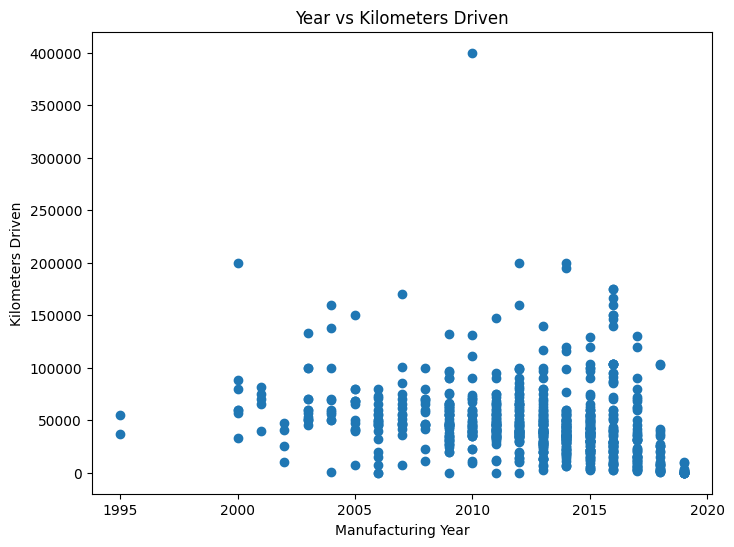

In [71]:
# Chart - 7 visualization code

# Relationship Between Year and Kilometers Driven

plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['kms_driven'])
plt.xlabel("Manufacturing Year")
plt.ylabel("Kilometers Driven")
plt.title("Year vs Kilometers Driven")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose this chart to understand how the kilometers driven changes with the car’s manufacturing year. A scatter plot helps us see if older cars usually have higher mileage compared to newer cars.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see that older cars generally have higher kilometers driven, while newer cars usually have lower mileage. This matches normal car usage behavior. There may also be a few outliers where some older cars have surprisingly low mileage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, this insight can help create a positive business impact. It helps sellers and buyers understand how car age and usage are related, which can support fair pricing. Businesses can use this information to judge whether a car’s mileage is normal for its age.

There are no major negative insights, but outliers (like very old cars with low mileage) may be suspicious or due to incorrect data, so they should be checked carefully. Overall, the insight is helpful for decision-making.

#### Chart - 8

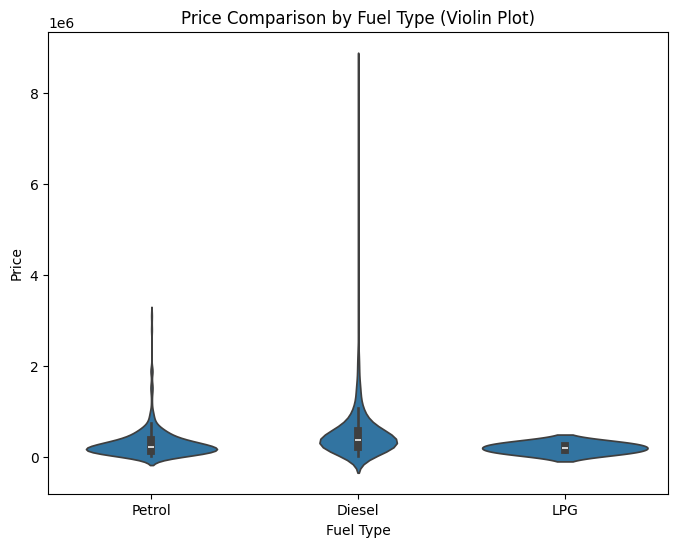

In [72]:
# Chart - 8 visualization code
# Price Comparison Across Different Fuel Types (Violin Plot)

plt.figure(figsize=(8,6))
sns.violinplot(x='fuel_type', y='Price', data=df)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Price Comparison by Fuel Type (Violin Plot)")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose this chart because a violin plot shows both the distribution and the spread of prices for each fuel type. It helps us understand not just the price range, but also how common different price levels are within each fuel type. This gives a clearer picture compared to a simple bar or boxplot.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see that each fuel type has a different price pattern. Some fuel types show higher price ranges, while others stay mostly in the lower range. The plot also shows the density, meaning which price levels are most common for each fuel type. This helps us see which fuel types tend to be more expensive or cheaper.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights can help in making better business decisions. Sellers can decide fair prices for their cars based on fuel type, and buyers can understand which fuel type offers better value. Businesses can also use this to understand market trends between fuel types.

There are no major negative insights, but if one fuel type has very few cars, the pattern may look misleading. Still, the overall insight helps in understanding price behavior and supports better decision-making.

#### Chart - 9

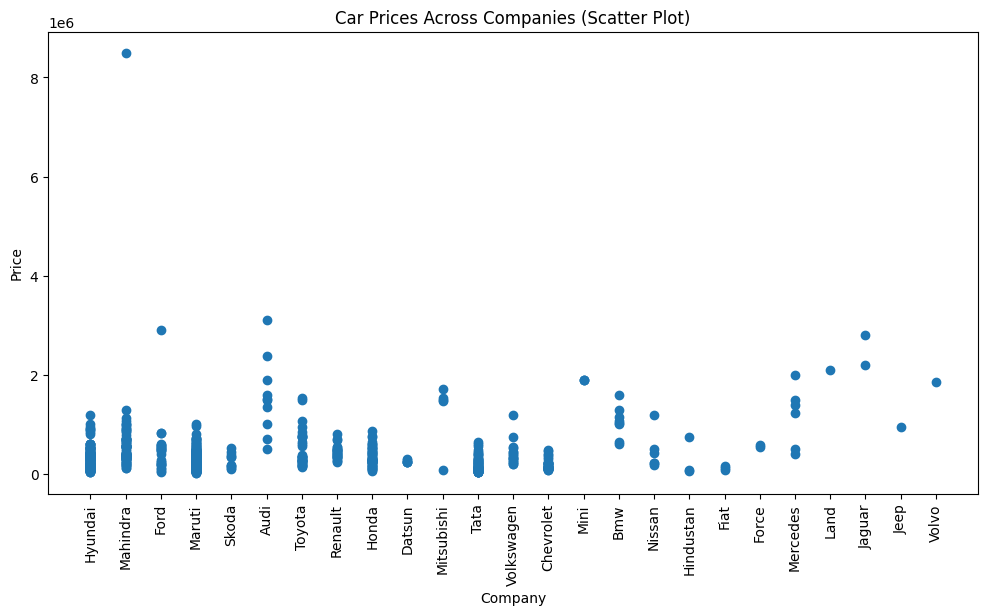

In [73]:
# Chart - 9 visualization code
# Car Prices Across Companies (Scatter Plot)

plt.figure(figsize=(12,6))
plt.scatter(df['company'], df['Price'])
plt.xlabel("Company")
plt.ylabel("Price")
plt.title("Car Prices Across Companies (Scatter Plot)")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked this chart to see how car prices are spread across different companies. A scatter plot helps us see all price points for each brand, not just the average. This gives a clear picture of how high or low the prices can be for each car company.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see that some companies have both low and high priced cars, while some brands mostly stay in one price range. It shows which companies sell expensive cars and which ones are usually cheaper. We also notice a few outliers where some cars are priced much higher than the normal range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here  

Yes, these insights can help create a positive business impact. Sellers and buyers can better understand the price trends of each company, which helps in setting fair prices and making smarter choices. Businesses can also use this to identify brands that give better profit margins.

There are no big negative insights, but outliers or incorrect prices can sometimes create confusion. As long as these unusual points are handled carefully, the insight is helpful for business decisions.

#### Chart - 10

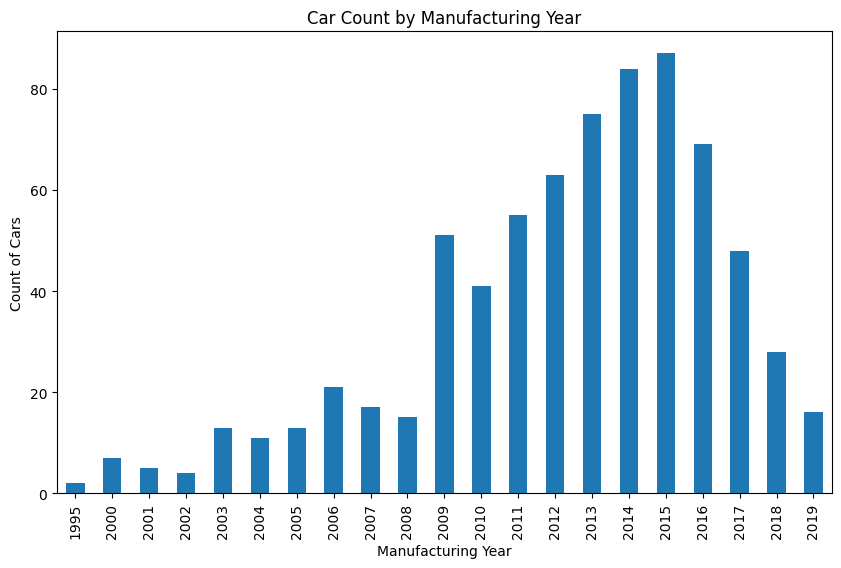

In [74]:
# Chart - 10 visualization code

plt.figure(figsize=(10,6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Manufacturing Year")
plt.ylabel("Count of Cars")
plt.title("Car Count by Manufacturing Year")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked this chart to see how many cars come from each manufacturing year. A bar chart is the best way to compare counts and understand which year has more cars in the dataset. It helps us quickly see the age distribution of the used cars.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see which years have the highest number of cars and which years have very few. This helps us understand the common age range of cars in the market. If some years have very low counts, it means fewer cars were listed from those years.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights can help create a positive business impact. Knowing the car year distribution helps sellers understand market supply and helps businesses plan which car age group to focus on. Buyers can also see whether most available cars are new or old.

There is no major negative impact, but if the dataset has too few cars from certain years, it may not represent the real market trend. This can slightly affect the model if not handled properly. Overall, the insight is useful for decision-making.

#### Chart - 11

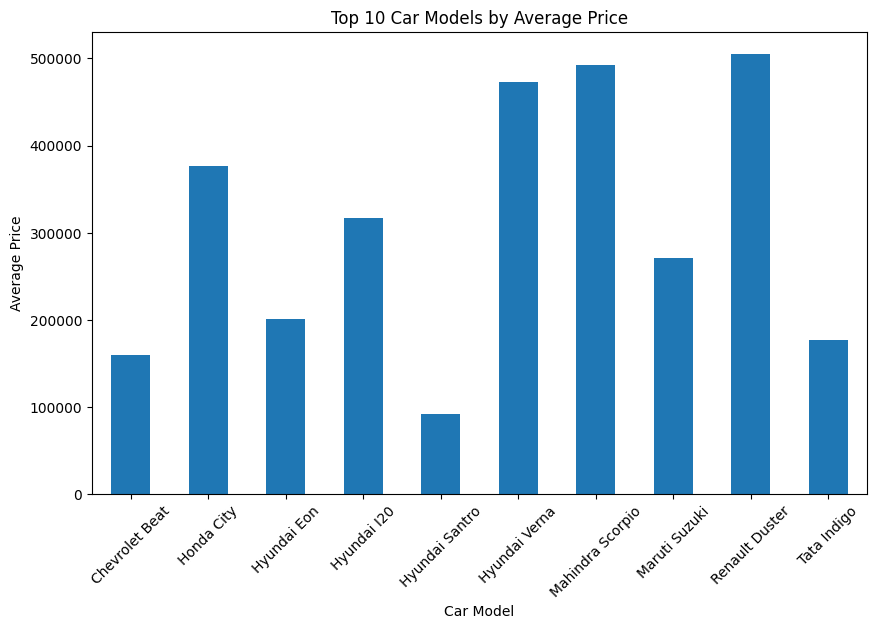

In [75]:
# Chart - 11 visualization code

# Relationship Between Price and Car Name (Top 10 Most Common Models)

# Top 10 most common car names
top_10 = df['name'].value_counts().head(10).index

plt.figure(figsize=(10,6))
df[df['name'].isin(top_10)].groupby('name')['Price'].mean().plot(kind='bar')
plt.xlabel("Car Model")
plt.ylabel("Average Price")
plt.title("Top 10 Car Models by Average Price")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I chose this chart to compare the average prices of the top 10 most common car models. A bar chart makes it easy to see which car models are more expensive and which ones are more affordable. This helps us understand the value of popular models in the used car market.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart, we can see clear price differences between different car models. Some models have a much higher average price, which shows they have better resale value. Other models stay in the lower price range, meaning they are more budget-friendly. This tells us how model popularity and brand value affect pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Yes, these insights can help create a positive business impact. Sellers can understand which car models sell for higher prices, and buyers can judge whether a model fits their budget. Car dealers can also focus on models with better profit margins.

There are no major negative insights, but if some models have very few cars, the average price may not represent the real market. Still, overall, the insight helps with better pricing and smarter business decisions.

#### Chart - 12 - Correlation Heatmap

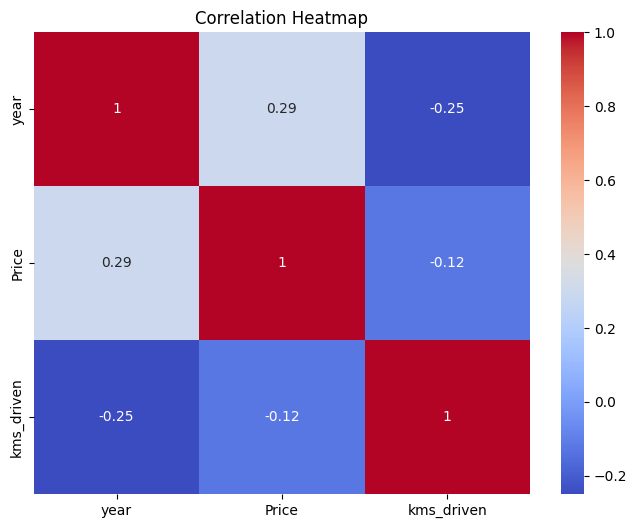

In [77]:
# Correlation Heatmap visualization code

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?



Answer Here.

I chose this chart to understand how the numerical features in the dataset are related to each other. A correlation heatmap helps us quickly see which variables have strong or weak relationships. This is very important for building a good machine learning model.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the heatmap, we can see how price is related to other numerical features like year and kilometers driven. Usually, price increases with newer cars (higher year) and decreases with more kilometers driven. The heatmap also shows if any features are strongly correlated or not connected at all.

#### Chart - 13 - Pair Plot

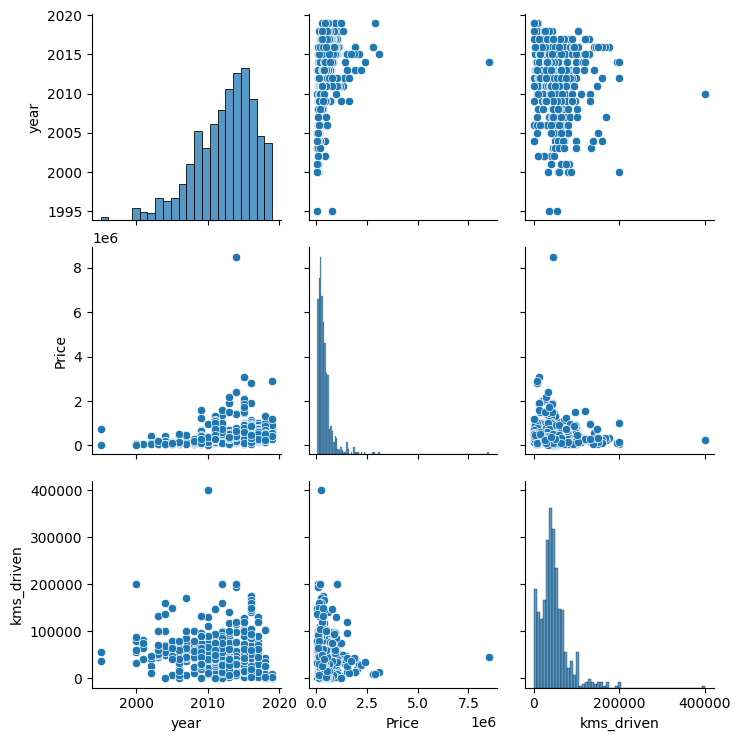

In [78]:
# Pair Plot visualization code

sns.pairplot(df.select_dtypes(include='number'))
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

I picked this chart because a pair plot shows the relationship between all numeric columns at the same time. It helps us quickly see patterns, trends, and how different features may affect each other. This chart makes it easy to understand the overall structure of the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the pair plot, we can see how price changes with year and kilometers driven. Newer cars usually have higher prices, and cars with more kilometers driven usually show lower prices. We can also see if any variables have a clear pattern or if some features do not show a strong relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [34]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [35]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [36]:
# Expand Contraction

#### 2. Lower Casing

In [37]:
# Lower Casing

#### 3. Removing Punctuations

In [38]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [39]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [40]:
# Remove Stopwords

In [41]:
# Remove White spaces

#### 6. Rephrase Text

In [42]:
# Rephrase Text

#### 7. Tokenization

In [43]:
# Tokenization

#### 8. Text Normalization

In [44]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [45]:
# POS Taging

#### 10. Text Vectorization

In [46]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [49]:
# Transform Your data

### 6. Data Scaling

In [50]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [51]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [53]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [59]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [62]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [63]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***